<a href="https://colab.research.google.com/github/TiatiThelen/Machine-Learning/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

    Read in file

In [12]:
bank = pd.read_csv('bank.csv', delimiter = ';')

    Look at correlation matrix before tranformations
     Note: it is only of the numerical variables

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


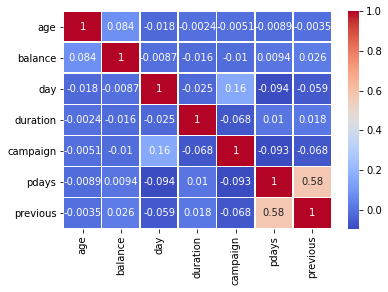

In [15]:
bank.head()
corr=bank.corr()
print(corr)
sns.heatmap(corr, cmap='coolwarm', annot=True, robust=True, linewidths=0.50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd7b51550>,
      dtype=object)

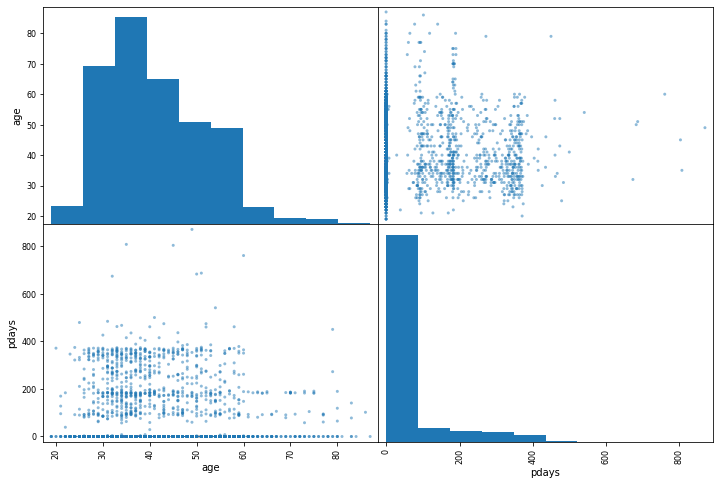

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["age", "pdays"]
scatter_matrix(bank[attributes], figsize=(12, 8))


Transform all variables into categorical/numerical

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [19]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [21]:
obj_df = bank.select_dtypes(include=['object']).copy()
obj_df.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [22]:
obj_df["job"] = obj_df["job"].astype('category')
obj_df.dtypes

bank["job_cat"] = obj_df["job"].cat.codes


obj_df["marital"] = obj_df["marital"].astype('category')
obj_df.dtypes

bank["marital_cat"] = obj_df["marital"].cat.codes



obj_df["education"] = obj_df["education"].astype('category')
obj_df.dtypes

bank["education_cat"] = obj_df["education"].cat.codes



obj_df["default"] = obj_df["default"].astype('category')
obj_df.dtypes
bank["default_cat"] = obj_df["default"].cat.codes


obj_df["housing"] = obj_df["housing"].astype('category')
obj_df.dtypes
bank["housing_cat"] = obj_df["housing"].cat.codes

obj_df["loan"] = obj_df["loan"].astype('category')
obj_df.dtypes
bank["loan_cat"] = obj_df["loan"].cat.codes

obj_df["contact"] = obj_df["contact"].astype('category')
obj_df.dtypes
bank["contact_cat"] = obj_df["contact"].cat.codes


obj_df["month"] = obj_df["month"].astype('category')
obj_df.dtypes
bank["month_cat"] = obj_df["month"].cat.codes

obj_df["poutcome"] = obj_df["poutcome"].astype('category')
obj_df.dtypes
bank["poutcome_cat"] = obj_df["poutcome"].cat.codes

obj_df["y"] = obj_df["y"].astype('category')
obj_df.dtypes
bank["y_cat"] = obj_df["y"].cat.codes

bank.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat,y_cat
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,10,1,0,0,0,0,0,10,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,7,1,1,0,1,1,0,8,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,4,2,2,0,1,0,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,4,1,2,0,1,1,2,6,3,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1,1,0,1,0,2,8,3,0


In [23]:
bank = bank.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' , 'y' ])

In [ ]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat,y_cat
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


Create Matrix and pull correlations > .6

In [25]:
corr_matrix = bank.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat,y_cat
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,-0.021500,-0.381485,-0.121613,-0.017885,-0.193888,-0.011250,0.015161,-0.040714,-0.009320,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.009797,0.024971,0.057725,-0.070886,-0.050227,-0.071349,-0.009665,0.023113,-0.029268,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,0.012865,0.008794,0.014926,-0.013261,-0.031291,-0.004879,-0.033807,-0.014795,0.073714,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,-0.006739,0.006619,-0.014878,-0.011615,0.015740,-0.004997,-0.011380,0.000851,0.000478,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.002739,0.005915,-0.001723,-0.012348,-0.003574,0.017120,0.012278,-0.108915,0.110703,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,-0.022760,0.017050,0.012077,-0.026317,0.116893,-0.031086,-0.243223,0.033292,-0.859245,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.005029,0.038028,0.023983,-0.026656,0.038621,-0.022115,-0.187232,0.046899,-0.636372,0.116714
job_cat,-0.021500,0.009797,0.012865,-0.006739,-0.002739,-0.022760,0.005029,1.000000,0.069390,0.170160,0.008324,-0.128353,-0.040245,-0.074068,-0.096613,0.013049,0.027401
marital_cat,-0.381485,0.024971,0.008794,0.006619,0.005915,0.017050,0.038028,0.069390,1.000000,0.102714,-0.020745,-0.029851,-0.045210,-0.068236,-0.035855,-0.027716,0.015042
education_cat,-0.121613,0.057725,0.014926,-0.014878,-0.001723,0.012077,0.023983,0.170160,0.102714,1.000000,-0.010534,-0.087070,-0.054086,-0.110554,-0.050086,-0.032135,0.042987


Create Scatter Matrix with correlations of selected parameters



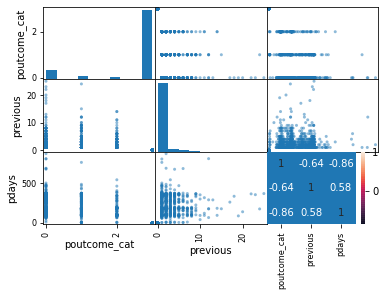

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["poutcome_cat", "previous", "pdays"]
pd.plotting.scatter_matrix(bank[attributes])

import matplotlib.pyplot as plt

corr=bank[attributes].corr()
sns.heatmap(corr, annot=True, robust=True, linewidths=0.50, alpha = .5)

Create train and test data set

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

3616 train + 905 test


In [ ]:

train_x = train_set.drop("y_cat", axis=1)

train_y = train_set["y_cat"].copy()


train_y.head()


test_x = test_set.drop("y_cat", axis=1)

test_y = test_set["y_cat"].copy()

test_x.head()



,age,balance,day,duration,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
2398,51,-2082,28,123,6,-1,0,2,1,1,1,0,1,0,5,3
800,50,2881,5,510,2,2,5,4,1,2,0,0,0,0,1,1
2288,50,1412,6,131,3,-1,0,9,1,1,0,0,0,0,1,3
2344,37,0,3,247,13,-1,0,4,1,2,0,1,0,2,6,3
3615,31,757,3,343,2,-1,0,0,2,1,0,0,0,0,3,3


        Linear Regression

In [ ]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)




LinearRegression()

In [ ]:
pred = regr.predict(test_x)



print('Coefficients: \n', regr.coef_)


print('Mean squared error: %.2f'
      % mean_squared_error(test_y, pred))



print('Coefficient of determination: %.2f'
      % r2_score(test_y, pred))



Coefficients: 
 [ 1.53923113e-03  9.25686589e-07  2.99738849e-04  5.04048252e-04
 -2.57705516e-03  3.38244520e-04  1.65022465e-02  2.86085813e-04
  7.64646370e-03  1.35764060e-02  5.00261409e-02 -6.25426031e-02
 -5.57921154e-02 -3.50043159e-02  1.46930930e-03  3.05206345e-02]
Mean squared error: 0.08
Coefficient of determination: 0.17


In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(test_y, pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)



from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_y, pred)
print(lin_mae)


from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred)
print(r2)



0.2829123670661054
0.17540952304813281
0.17110138737977187


    Showing Decision Tree Regression has better RMSE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_x, train_y)


pred = tree_reg.predict(test_x)
tree_mse = mean_squared_error(test_y, pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.36565237242299353

        KNN 

    n=4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_knn_pred)

0.8773480662983425

    n = 6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=6)
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_knn_pred)

0.8784530386740331

    n = 10

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_knn_pred)

0.8883977900552487

    n = 20

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=20)
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=20, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_knn_pred)

0.887292817679558

                        Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [ ]:
model = GaussianNB()
model = model.fit(train_x, train_y)

In [ ]:
pred = model.predict(test_x)

In [ ]:
accuracy = accuracy_score(pred, test_y)
accuracy

0.8320441988950277